In [21]:
import json

jsonFile = open('./CatracaLivrePosts.json', 'r').read()

posts = json.loads(jsonFile)

posts = [post for post in posts if int(post["created_time"][:4]) < 2016]
print("posts loaded")

posts loaded


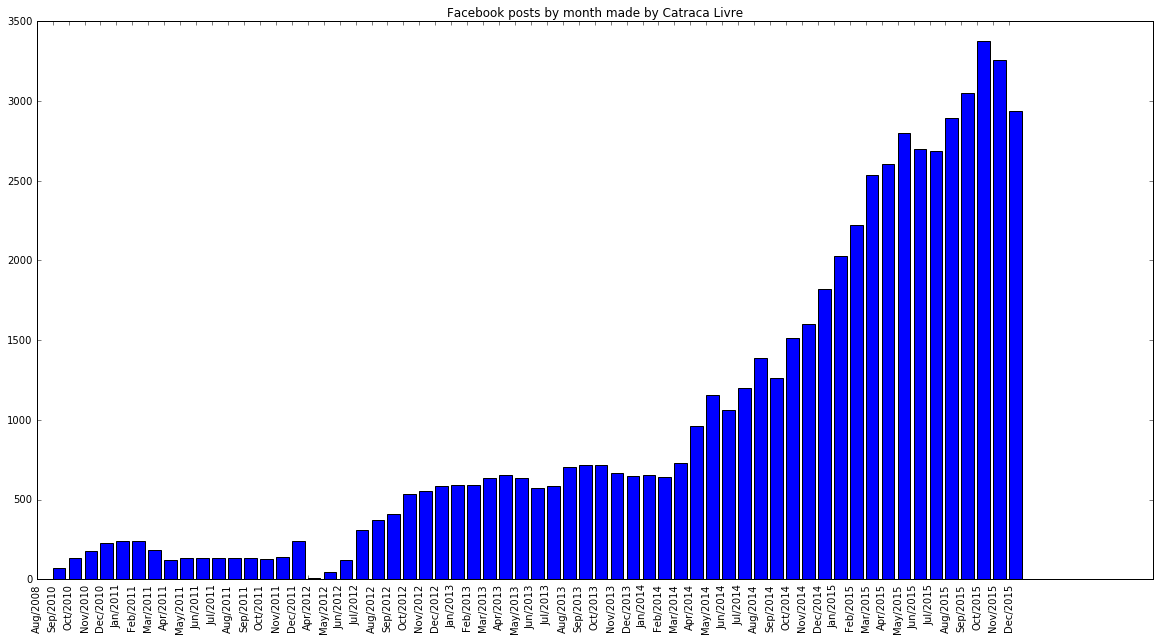

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

postsByMonth = {}

for curPost in posts:
    postTime = time.strptime(curPost["created_time"][:-5], "%Y-%m-%dT%H:%M:%S")
    month = time.strftime("%b/%Y", postTime)
    
    if(postsByMonth.__contains__(month)):
        postsByMonth[month] += 1
    else:
        postsByMonth[month] = 1

sortedPostsByMonth = sorted(postsByMonth.items(), key=lambda month: time.strptime(month[0], "%b/%Y"))

dictionary = plt.figure(figsize=(20,10))

plt.bar(range(len(sortedPostsByMonth)), [x[1] for x in sortedPostsByMonth])
plt.xticks(range(len(sortedPostsByMonth)), [x[0] for x in sortedPostsByMonth],rotation='vertical')
plt.title('Facebook posts by month made by Catraca Livre')
plt.show()

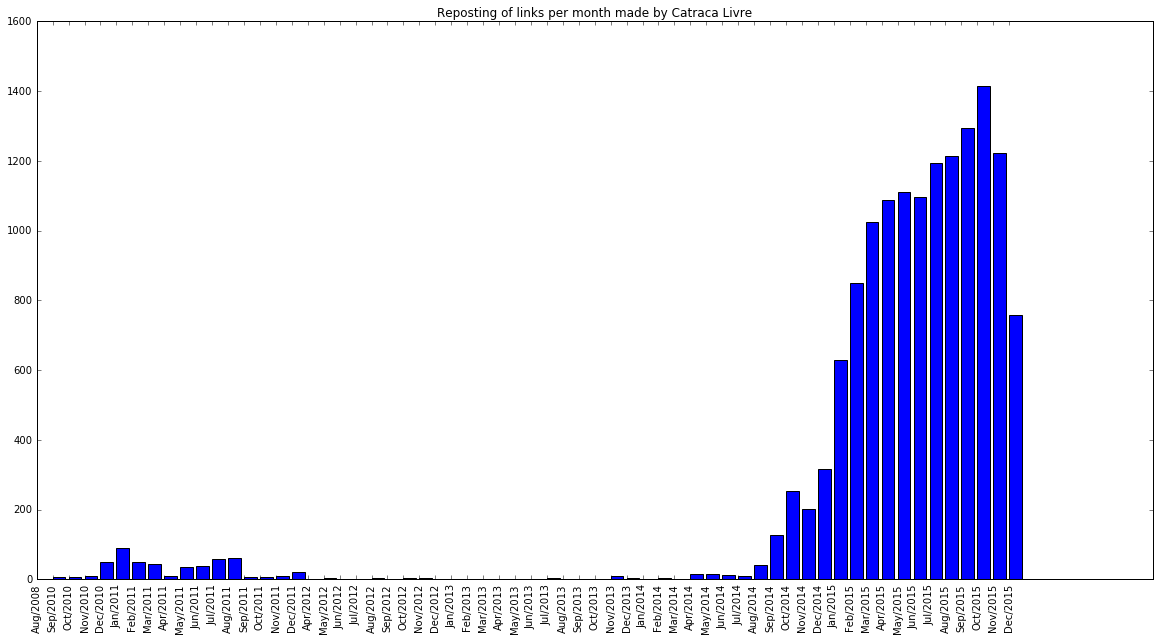

In [86]:
%matplotlib inline
import time

repetitionsPerMonth = {}
linksShared = {}

for curPost in posts:
    if("link" in curPost):
        postTime = time.strptime(curPost["created_time"][:-5], "%Y-%m-%dT%H:%M:%S")
        month = time.strftime("%b/%Y", postTime)
        
        if(curPost["link"] in linksShared):
            if(repetitionsPerMonth.__contains__(month)):
                repetitionsPerMonth[month] += 1
            else:
                repetitionsPerMonth[month] = 1
            
            linksShared[curPost["link"]] += 1
        else:
            linksShared[curPost["link"]] = 1

for curMonth in postsByMonth:
    if(curMonth not in repetitionsPerMonth):
        repetitionsPerMonth[curMonth] = 0
            
sortedRepetitionsByMonth = sorted(repetitionsPerMonth.items(), key=lambda month: time.strptime(month[0], "%b/%Y"))

dictionary = plt.figure(figsize=(20,10))

plt.bar(range(len(sortedRepetitionsByMonth)), [x[1] for x in sortedRepetitionsByMonth])
plt.xticks(range(len(sortedRepetitionsByMonth)), [x[0] for x in sortedRepetitionsByMonth],rotation='vertical')
plt.title('Reposting of links per month made by Catraca Livre')
plt.show()

In [24]:
mostRepostedLinks = sorted(linksShared.items(), key=lambda link: link[1])

mostRepostedLinks.reverse()

mostRepostedLinks[:5]

[('https://catracalivre.com.br/geral/invencoes-ideias/indicacao/confira-105-dicas-que-vao-transformar-a-sua-vida-de-solteiro/',
  91),
 ('https://catracalivre.com.br/geral/design-urbanidade/indicacao/selecao-de-tatuagens-femininas/',
  27),
 ('https://catracalivre.com.br/geral/gastronomia/indicacao/dicas-rapidas-e-baratas-do-site-sos-solteiros-para-matar-a-fome-criatividade/',
  25),
 ('https://estilo.catracalivre.com.br/beleza/97-tatuagens-para-quem-gosta-de-discricao-e-delicadeza/',
  25),
 ('https://catracalivre.com.br/geral/saude-bem-estar/indicacao/truque-de-respiracao-ajuda-a-aliviar-o-estresse-e-a-ansiedade/',
  25)]

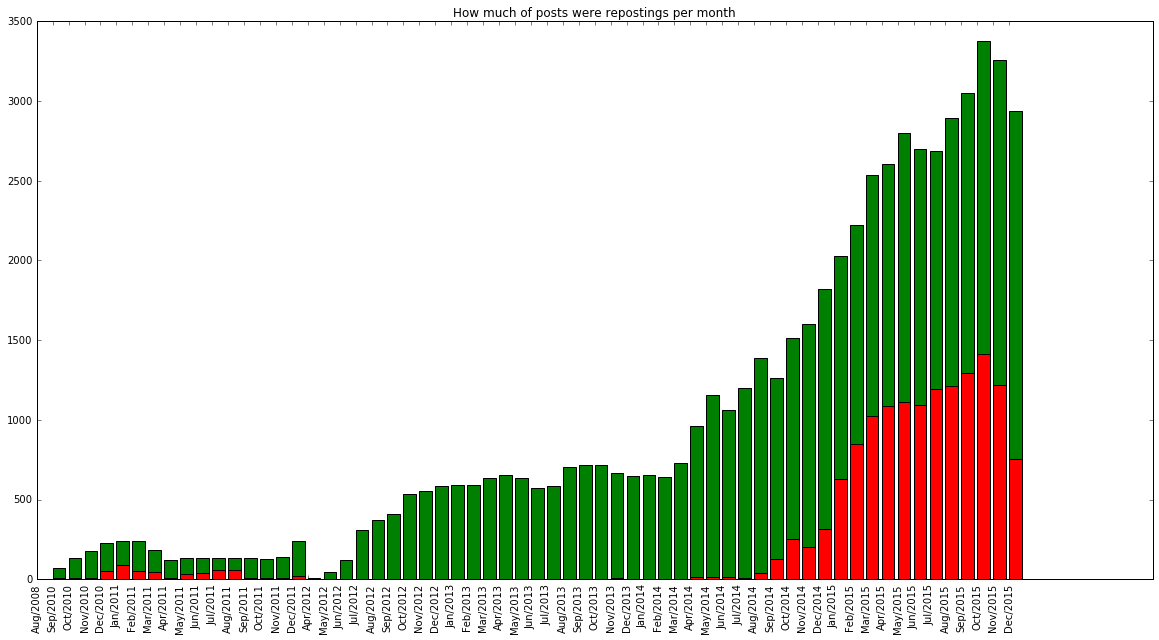

In [87]:
dictionary = plt.figure(figsize=(20,10))

plt.bar(range(len(sortedPostsByMonth)), [x[1] for x in sortedPostsByMonth], color='g')
plt.bar(range(len(sortedRepetitionsByMonth)), [x[1] for x in sortedRepetitionsByMonth], color='r')
plt.xticks(range(len(sortedRepetitionsByMonth)), [x[0] for x in sortedRepetitionsByMonth],rotation='vertical')
plt.title('How much of posts were repostings per month')
plt.show()

In [26]:
sexPostsPerMonth = {}

sexRelatedWords = ['sexo', 'bumbum', 'penis', 'vagina', 'orgasmo', 'masturbacao', 
                   'semen', 'seios', 'transar', 'porn', 'na-cama', 'sexual', 'libido'
                  'papai-e-mamae', 'anus', 'transando', 'boas-de-cama', 'vibrador', 'virgem'
                  'sexuais', 'sexualidade', 'erotic', 'fetiche', 'ejaculacao', 'dst', 'sexy'
                  'kama-sutra', 'erotika', 'camisinha', 'concepcional', 'virgindade']

links = []

for curPost in posts:
    if("link" in curPost):
        postTime = time.strptime(curPost["created_time"][:-5], "%Y-%m-%dT%H:%M:%S")
        month = time.strftime("%b/%Y", postTime)
        
        if any(word in curPost['link'] for word in sexRelatedWords):
            if(sexPostsPerMonth.__contains__(month)):
                sexPostsPerMonth[month] += 1
            else:
                sexPostsPerMonth[month] = 1
            
            links.append(curPost['link'])
            
for curMonth in postsByMonth:
    if(curMonth not in sexPostsPerMonth):
        sexPostsPerMonth[curMonth] = 0

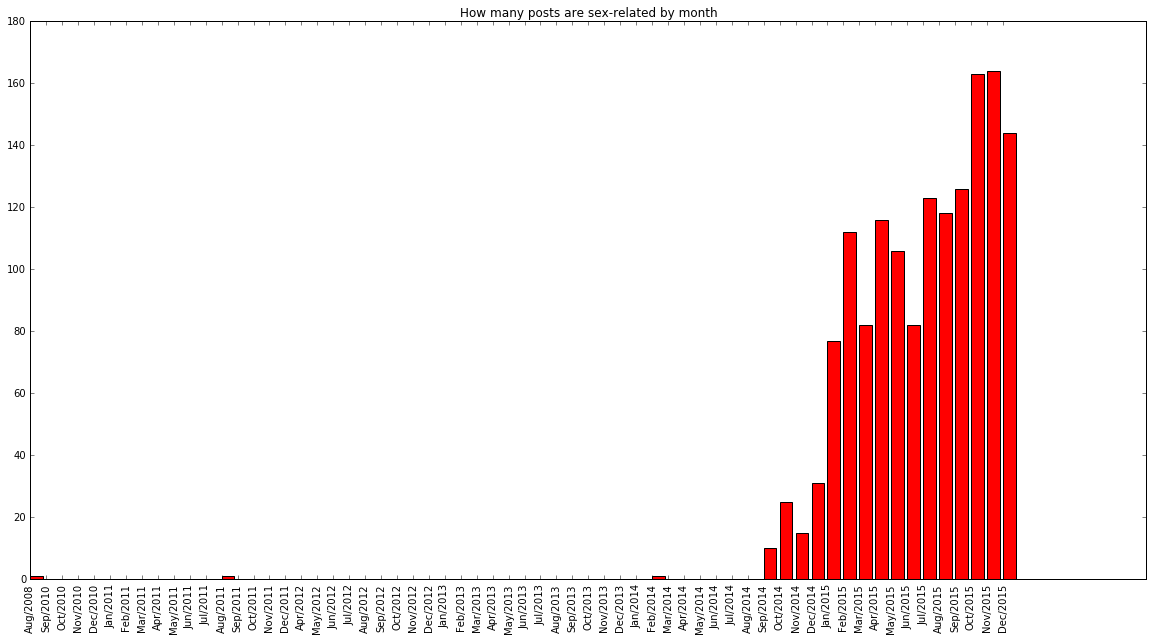

In [93]:
sortedSexPostsPerMonth = sorted(sexPostsPerMonth.items(), key=lambda month: time.strptime(month[0], "%b/%Y"))

dictionary = plt.figure(figsize=(20,10))

plt.bar(range(len(sortedSexPostsPerMonth)), [x[1] for x in sortedSexPostsPerMonth], color='r')
plt.xticks(range(len(sortedPostsByMonth)), [x[0] for x in sortedPostsByMonth],rotation='vertical')
plt.title('How many posts are sex-related by month')
plt.show()

In [74]:
urlVidaSolteiro = 'https://catracalivre.com.br/geral/invencoes-ideias/indicacao/confira-105-dicas-que-vao-transformar-a-sua-vida-de-solteiro/'

postsWithLinks = [i for i in posts if 'link' in i]

postVidaSolteiro = [(i['created_time'], 1) for i in postsWithLinks if i['link'] == urlVidaSolteiro]

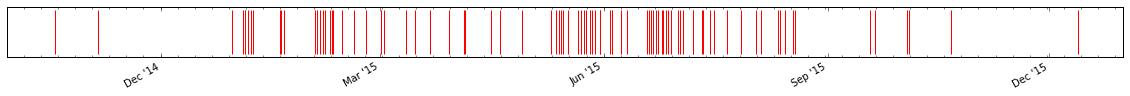

In [76]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import time

date1 = datetime.date(2002, 1, 5)
date2 = datetime.date(2003, 12, 1)

# every monday
mondays = WeekdayLocator(MONDAY)

# every 3rd month
months = MonthLocator(range(1, 13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%b '%y")

dates = [mdates.date2num(datetime.datetime.strptime(q[0][:-5], "%Y-%m-%dT%H:%M:%S")) for q in postVidaSolteiro]
opens = [q[1] for q in postVidaSolteiro]

weird = mpath.Path(verts, codes)

fig, ax = plt.subplots(figsize=(20,1))
ax.plot_date(dates, opens, marker = "None")
ymin, ymax = ax.get_ylim()
ax.vlines(x=dates, ymin=ymin, ymax=ymax-1, color='r')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(mondays)
ax.autoscale_view()
ax.grid(False)
ax.get_yaxis().set_visible(False)

fig.autofmt_xdate()

plt.show()